# Data Preprocessing

#### Imports

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import feather

from sklearn.model_selection import train_test_split
from tqdm import tqdm

#### Read FTR and process dataset

In [2]:
#read ftr
data = pd.read_feather( '../dataset/df1.ftr', columns=None, use_threads=True)

In [3]:
data.head(100)

,kara,harris,mani,levers,audio,zorro,sneaky,pennies,misinterpret,boss,...,deaths,leaved,obtain,glory,unenthusiastic,desire,proctor,adapted,persuade,polarityClass
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,2
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,2
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,2
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,2
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,2
96,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,2
97,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,2
98,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,2


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 105436 entries, 0 to 105435
Columns: 21169 entries, kara to polarityClass
dtypes: uint8(21169)
memory usage: 2.1 GB


In [5]:
#count nulls in entire dataframe
data.isnull().sum().sum()

0

### Check the distribution of classes

<AxesSubplot:xlabel='polarityClass', ylabel='count'>

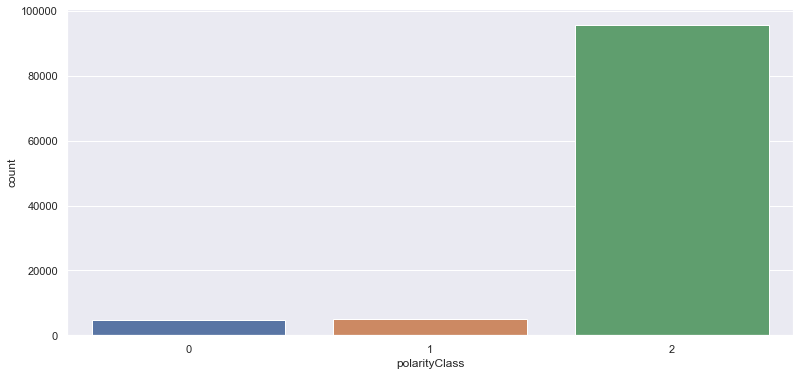

In [6]:
#plot with the distribution of classes
sns.set(rc={'figure.figsize':(13.0,6)})
sns.countplot(x='polarityClass',data=data)

## Model 1 (frequency of words)

#### Divide dataset into train and test

In [7]:
#divide dataset into train (70%) and test (30%) (first model)
train_m1, test_m1 = train_test_split(data, test_size=0.3)

2    67075
1     3509
0     3221
Name: polarityClass, dtype: int64

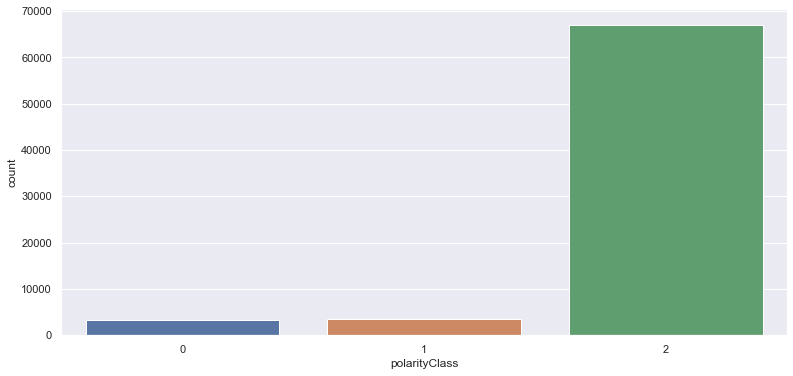

In [8]:
#plot with the distribution of classes in train
sns.set(rc={'figure.figsize':(13.0,6)})
sns.countplot(x='polarityClass',data=train_m1)
train_m1['polarityClass'].value_counts()

2    28708
1     1502
0     1421
Name: polarityClass, dtype: int64

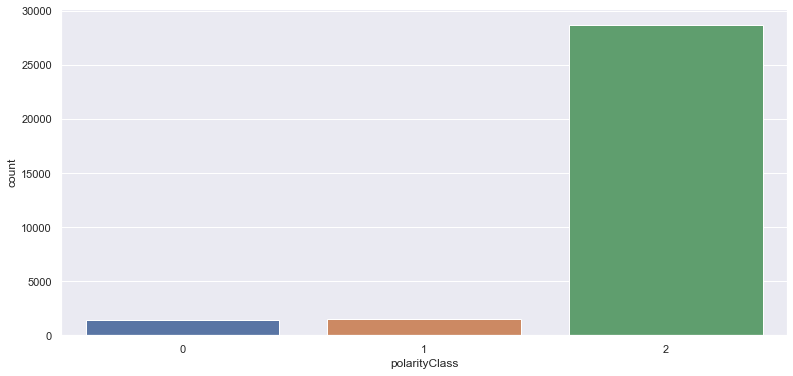

In [9]:
#plot with the distribution of classes in test
sns.set(rc={'figure.figsize':(13.0,6)})
sns.countplot(x='polarityClass',data=test_m1)
test_m1['polarityClass'].value_counts()

## Balancing

In [10]:
import imblearn
from imblearn.over_sampling import RandomOverSampler
from imblearn.under_sampling import RandomUnderSampler

from imblearn.over_sampling import SMOTE

#get target
train_m1_target = train_m1['polarityClass']
train_m1 = train_m1.drop(columns=['polarityClass']) 
#Data course
strategy = {0:7000,1:7000}#7500
strategy2 = {0:7000,1:7000,2:30000}#7500

over = RandomOverSampler(sampling_strategy=strategy)
under = RandomUnderSampler(sampling_strategy=strategy2)
train_m1,train_m1_target=over.fit_resample(train_m1,train_m1_target)
train_m1,train_m1_target=under.fit_resample(train_m1,train_m1_target)

In [11]:
train_m1_target.value_counts()

2    30000
1     7000
0     7000
Name: polarityClass, dtype: int64

In [12]:
train_m1['polarityClass'] = train_m1_target.values

## Save model 1 (frequency of words)

In [13]:
train_m1.reset_index(inplace=True)
test_m1.reset_index(inplace=True)

In [14]:
#save to ftr
train_m1.to_feather("../dataset/train_m1.ftr")
test_m1.to_feather("../dataset/test_m1.ftr")

## Model 2 (existence of words)

#### Read FTR and process dataset

In [15]:
#read ftr
data2 = pd.read_feather( '../dataset/df2.ftr', columns=None, use_threads=True)

In [16]:
data2.head(100)

,kara,harris,mani,levers,audio,zorro,sneaky,pennies,misinterpret,boss,...,deaths,leaved,obtain,glory,unenthusiastic,desire,proctor,adapted,persuade,polarityClass
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,2
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,2
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,2
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,2
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,2
96,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,2
97,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,2
98,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,2


#### Divide dataset into train and test

In [17]:
#divide dataset into train (70%) and test (30%) (first model)
train_m2, test_m2 = train_test_split(data2, test_size=0.3)

2    67075
1     3538
0     3192
Name: polarityClass, dtype: int64

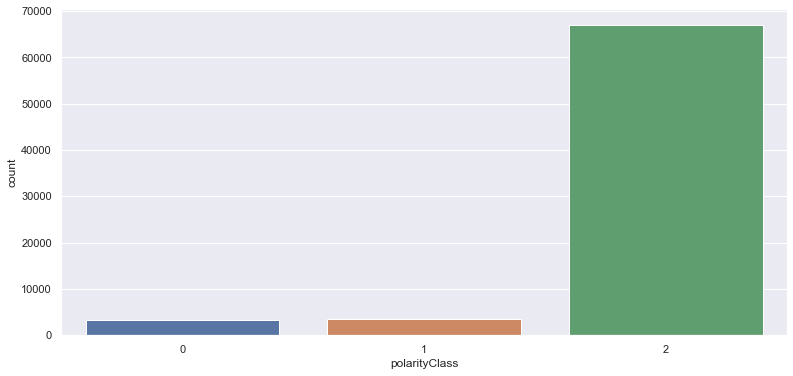

In [18]:
#plot with the distribution of classes in train
sns.set(rc={'figure.figsize':(13.0,6)})
sns.countplot(x='polarityClass',data=train_m2)
train_m2['polarityClass'].value_counts()

2    28708
1     1473
0     1450
Name: polarityClass, dtype: int64

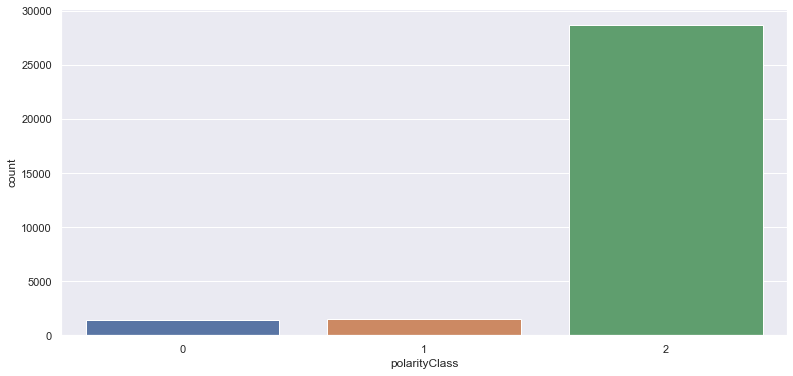

In [19]:
#plot with the distribution of classes in train
sns.set(rc={'figure.figsize':(13.0,6)})
sns.countplot(x='polarityClass',data=test_m2)
test_m2['polarityClass'].value_counts()

## Balancing

In [20]:
import imblearn
from imblearn.over_sampling import RandomOverSampler
from imblearn.under_sampling import RandomUnderSampler

from imblearn.over_sampling import SMOTE

#get target
train_m2_target = train_m2['polarityClass']
train_m2 = train_m2.drop(columns=['polarityClass']) 
#Data course
strategy = {0:7000,1:7000}#7500
strategy2 = {0:7000,1:7000,2:30000}#7500

over = RandomOverSampler(sampling_strategy=strategy)
under = RandomUnderSampler(sampling_strategy=strategy2)
train_m2,train_m2_target=over.fit_resample(train_m2,train_m2_target)
train_m2,train_m2_target=under.fit_resample(train_m2,train_m2_target)

In [21]:
train_m2_target.value_counts()

2    30000
1     7000
0     7000
Name: polarityClass, dtype: int64

In [22]:
train_m2['polarityClass'] = train_m2_target.values

## Save model 2 (existence of words)

In [23]:
train_m2.reset_index(inplace=True)
test_m2.reset_index(inplace=True)

In [24]:
#save to ftr
train_m2.to_feather("../dataset/train_m2.ftr")
test_m2.to_feather("../dataset/test_m2.ftr")